In [28]:
import folium
import missingno as msno
from plotnine import *
import seaborn as sns

import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False

import matplotlib.pyplot as plt

plt.rcParams["font.size"] = 10  # 글꼴 크기 설정
plt.rcParams["font.family"] = "NanumGothicCoding"  # 글꼴 설정

import numpy as np
import pandas as pd

pd.options.display.float_format = '{:,}'.format

import warnings

warnings.filterwarnings("ignore")

# 전국 도시공원정보 표준 데이터
공공데이터포털(https://www.data.go.kr)에서 검색

In [29]:
# 데이터 로드
park_202212 = pd.read_csv('./data/park_202212.csv', sep=',')
# park_202212.to_csv('./data/park_202212.csv')
park_202212

Unnamed: 0         관리번호              공원명   공원구분 소재지도로명주소  \
0               0  47190-00127           백현체육공원   체육공원      NaN   
1               1  47190-00128            둘모아공원  어린이공원      NaN   
2               2  47190-00129            다붓소공원    소공원      NaN   
3               3  47190-00130            다붓1공원  어린이공원      NaN   
4               4  47190-00131            다붓2공원  어린이공원      NaN   
...           ...          ...              ...    ...      ...   
17460       17460  41461-00025      삼가지구 어린이공원1  어린이공원      NaN   
17461       17461  41461-00026       삼가1지구 체육공원   체육공원      NaN   
17462       17462  41461-00027      제107호 어린이공원  어린이공원      NaN   
17463       17463  41461-00028      제105호 어린이공원  어린이공원      NaN   
17464       17464  41465-00016  제15호 근린공원(수지공원)   근린공원      NaN   

                       소재지지번주소          위도          경도     공원면적 공원보유시설(운동시설)  \
0          경상북도 구미시 산동면 백현리 79 36.18642933 128.4784907 90,967.0          NaN   
1           경상북도 구미시 봉곡동 584-2   36.148431 128.3165939  4,279.0          NaN   
2          경상북도 구미시 봉곡동 765 일원   36.155883  128.311526    805.0          NaN   
3           경상북도 구미시 봉곡동 457-1   36.156392  128.314372  1,585.0          NaN   
4             경상북도 구미시 봉곡동 767 36.15480813  128.314372  1,637.0          NaN   
...                        ...         ...         ...      ...          ...   
17460    경기도 용인시 처인구 삼가동 288-1   37.238001 127.1642486  4,878.0          NaN   
17461   경기도 용인시 처인구 삼가동 268-26 37.23823531 127.1693019 17,748.0          NaN   
17462  경기도 용인시 처인구 모현읍 왕산리 949 37.33393818 127.2538619  5,817.0          NaN   
17463   경기도 용인시 처인구 포곡읍 둔전리450 37.27292155 127.2217992  2,558.0          NaN   
17464     경기도 용인시 수지구 풍덕천동 696 37.32397857 127.0910048 15,741.0          NaN   

      공원보유시설(유희시설) 공원보유시설(편익시설) 공원보유시설(교양시설) 공원보유시설(기타시설)       지정고시일 관리기관명  \
0              NaN          NaN          NaN          NaN         NaN   NaN   
1              NaN          NaN          NaN          NaN         NaN   NaN   
2              NaN          NaN          NaN          NaN         NaN   NaN   
3              NaN          NaN          NaN          NaN         NaN   NaN   
4              NaN          NaN          NaN          NaN         NaN   NaN   
...            ...          ...          ...          ...         ...   ...   
17460          NaN          NaN          NaN          NaN  2008-10-02   NaN   
17461          NaN          NaN          NaN          NaN  2008-10-02   NaN   
17462          NaN          NaN          NaN          NaN  2008-10-06   NaN   
17463          NaN          NaN          NaN          NaN  2008-10-06   NaN   
17464          NaN          NaN          NaN          NaN  1995-12-30   NaN   

      전화번호     데이터기준일자   제공기관코드     제공기관명  
0      NaN  2022-06-09  5080000  경상북도 구미시  
1      NaN  2022-06-09  5080000  경상북도 구미시  
2      NaN  2022-06-09  5080000  경상북도 구미시  
3      NaN  2022-06-09  5080000  경상북도 구미시  
4      NaN  2022-06-09  5080000  경상북도 구미시  
...    ...         ...      ...       ...  
17460  NaN  2022-11-23  4050000   경기도 용인시  
17461  NaN  2022-11-23  4050000   경기도 용인시  
17462  NaN  2022-11-23  4050000   경기도 용인시  
17463  NaN  2022-11-23  4050000   경기도 용인시  
17464  NaN  2022-11-23  4050000   경기도 용인시  

[17465 rows x 20 columns]

In [30]:
# park_202212.dtypes
park_202212.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17465 entries, 0 to 17464
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    17465 non-null  int64  
 1   관리번호          17465 non-null  object 
 2   공원명           17465 non-null  object 
 3   공원구분          17465 non-null  object 
 4   소재지도로명주소      4114 non-null   object 
 5   소재지지번주소       17126 non-null  object 
 6   위도            17425 non-null  float64
 7   경도            17426 non-null  float64
 8   공원면적          17465 non-null  float64
 9   공원보유시설(운동시설)  4849 non-null   object 
 10  공원보유시설(유희시설)  6170 non-null   object 
 11  공원보유시설(편익시설)  4848 non-null   object 
 12  공원보유시설(교양시설)  807 non-null    object 
 13  공원보유시설(기타시설)  2585 non-null   object 
 14  지정고시일         14552 non-null  object 
 15  관리기관명         15956 non-null  object 
 16  전화번호          16194 non-null  object 
 17  데이터기준일자       17465 non-null  object 
 18  제공기관코드        17465 non-nu

<AxesSubplot:>

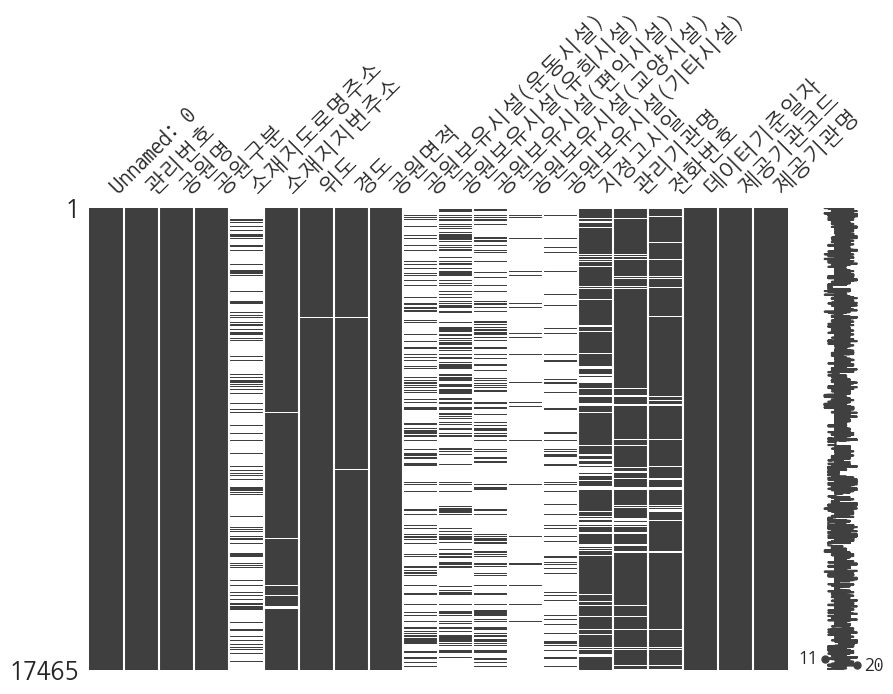

In [31]:
msno.matrix(park_202212, figsize=(10, 6))

In [32]:
park_202212.columns

Index(['Unnamed: 0', '관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도',
       '공원면적', '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명'],
      dtype='object')

In [33]:
# drop() 함수로 불필요한 컬럼을 제거한다.
# columns 속성에 제거할 열 이름을 지정한다. 단, 제거할 열이 2개 이상일 경우 []로 묶어서 리스트로 넘겨야 한다.
# inplace=True 속성을 지정하면 실행 결과가 데이터프레임에 바로 적용된다.
park_202212.drop(columns=['공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
                          '공원보유시설(기타시설)', '지정고시일', '관리기관명'], inplace=True)
park_202212

Unnamed: 0         관리번호              공원명   공원구분 소재지도로명주소  \
0               0  47190-00127           백현체육공원   체육공원      NaN   
1               1  47190-00128            둘모아공원  어린이공원      NaN   
2               2  47190-00129            다붓소공원    소공원      NaN   
3               3  47190-00130            다붓1공원  어린이공원      NaN   
4               4  47190-00131            다붓2공원  어린이공원      NaN   
...           ...          ...              ...    ...      ...   
17460       17460  41461-00025      삼가지구 어린이공원1  어린이공원      NaN   
17461       17461  41461-00026       삼가1지구 체육공원   체육공원      NaN   
17462       17462  41461-00027      제107호 어린이공원  어린이공원      NaN   
17463       17463  41461-00028      제105호 어린이공원  어린이공원      NaN   
17464       17464  41465-00016  제15호 근린공원(수지공원)   근린공원      NaN   

                       소재지지번주소          위도          경도     공원면적 전화번호  \
0          경상북도 구미시 산동면 백현리 79 36.18642933 128.4784907 90,967.0  NaN   
1           경상북도 구미시 봉곡동 584-2   36.148431 128.3165939  4,279.0  NaN   
2          경상북도 구미시 봉곡동 765 일원   36.155883  128.311526    805.0  NaN   
3           경상북도 구미시 봉곡동 457-1   36.156392  128.314372  1,585.0  NaN   
4             경상북도 구미시 봉곡동 767 36.15480813  128.314372  1,637.0  NaN   
...                        ...         ...         ...      ...  ...   
17460    경기도 용인시 처인구 삼가동 288-1   37.238001 127.1642486  4,878.0  NaN   
17461   경기도 용인시 처인구 삼가동 268-26 37.23823531 127.1693019 17,748.0  NaN   
17462  경기도 용인시 처인구 모현읍 왕산리 949 37.33393818 127.2538619  5,817.0  NaN   
17463   경기도 용인시 처인구 포곡읍 둔전리450 37.27292155 127.2217992  2,558.0  NaN   
17464     경기도 용인시 수지구 풍덕천동 696 37.32397857 127.0910048 15,741.0  NaN   

          데이터기준일자   제공기관코드     제공기관명  
0      2022-06-09  5080000  경상북도 구미시  
1      2022-06-09  5080000  경상북도 구미시  
2      2022-06-09  5080000  경상북도 구미시  
3      2022-06-09  5080000  경상북도 구미시  
4      2022-06-09  5080000  경상북도 구미시  
...           ...      ...       ...  
17460  2022-11-23  4050000   경기도 용인시  
17461  2022-11-23  4050000   경기도 용인시  
17462  2022-11-23  4050000   경기도 용인시  
17463  2022-11-23  4050000   경기도 용인시  
17464  2022-11-23  4050000   경기도 용인시  

[17465 rows x 13 columns]

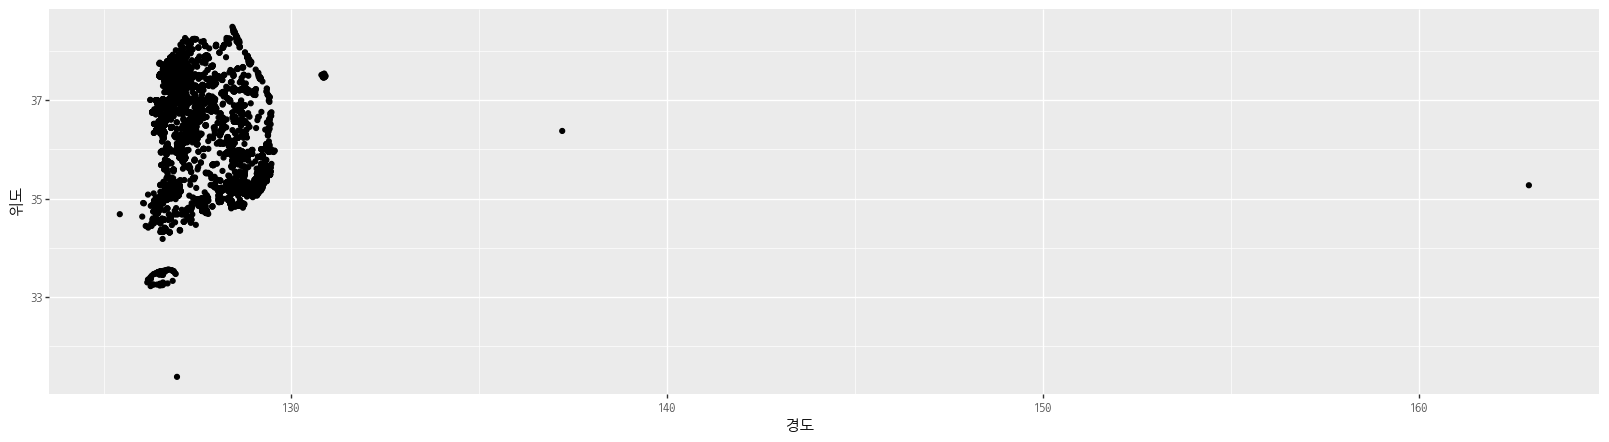

<ggplot: (362001146)>

In [34]:
(ggplot(park_202212, aes(x='경도', y='위도'))
 + geom_point()
 + theme(text=element_text(family='NanumGothicCoding'), figure_size=(20, 5))
 )

<AxesSubplot:xlabel='경도', ylabel='위도'>

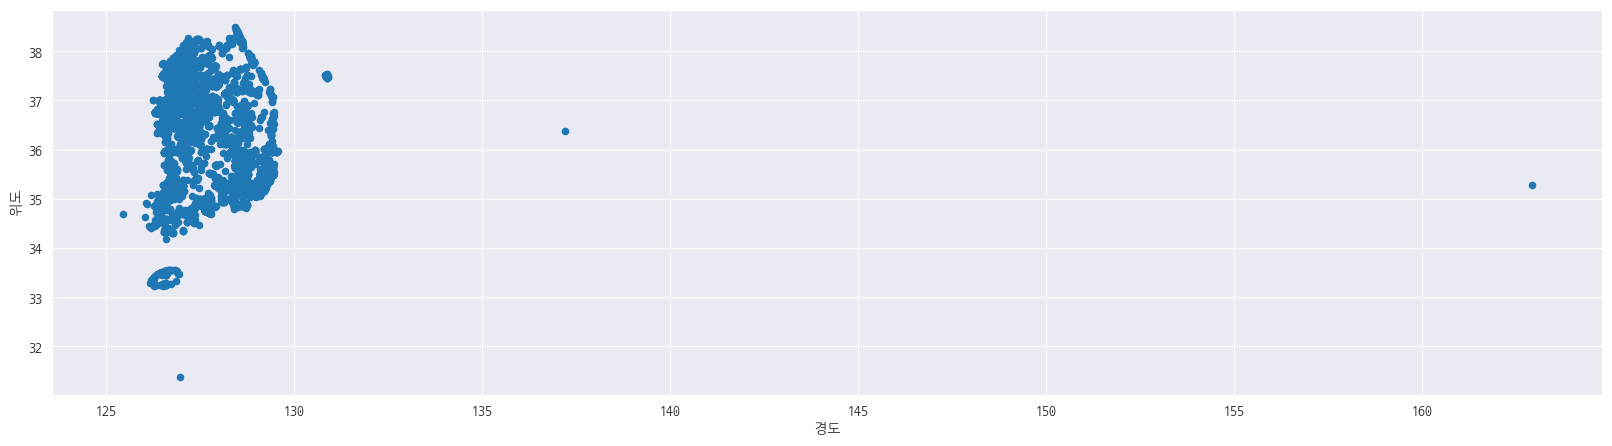

In [35]:
park_202212.plot.scatter(x='경도', y='위도', grid=True, figsize=(20, 5))

# 주소 데이터 전처리
도로명주소가 NaN이면 지번주소로 채운다.

In [36]:
park_202212.dtypes

Unnamed: 0      int64
관리번호           object
공원명            object
공원구분           object
소재지도로명주소       object
소재지지번주소        object
위도            float64
경도            float64
공원면적          float64
전화번호           object
데이터기준일자        object
제공기관코드         object
제공기관명          object
dtype: object

In [37]:
park_202212.공원면적

0       90,967.0
1        4,279.0
2          805.0
3        1,585.0
4        1,637.0
          ...   
17460    4,878.0
17461   17,748.0
17462    5,817.0
17463    2,558.0
17464   15,741.0
Name: 공원면적, Length: 17465, dtype: float64

In [38]:
# CircleMarker를 표시하기 위해 '공원면적' 열을 적당한 수식을 실행해서 '공원면적비율' 열을 만든다.
# 시리즈.apply(lambda 변수: 수식)
# 시리즈에 저장된 데이터가 lambda 뒤의 변수로 한 건씩 전달되고 ':' 다음의 수식을 실행한 후 apply() 메서드에 의해서 일괄 적용된다.
park_202212['공원면적비율'] = park_202212['공원면적'].apply(lambda x: np.sqrt(x) * 0.01)

In [39]:
print(type(park_202212['공원면적']))
park_202212

<class 'pandas.core.series.Series'>


Unnamed: 0         관리번호              공원명   공원구분 소재지도로명주소  \
0               0  47190-00127           백현체육공원   체육공원      NaN   
1               1  47190-00128            둘모아공원  어린이공원      NaN   
2               2  47190-00129            다붓소공원    소공원      NaN   
3               3  47190-00130            다붓1공원  어린이공원      NaN   
4               4  47190-00131            다붓2공원  어린이공원      NaN   
...           ...          ...              ...    ...      ...   
17460       17460  41461-00025      삼가지구 어린이공원1  어린이공원      NaN   
17461       17461  41461-00026       삼가1지구 체육공원   체육공원      NaN   
17462       17462  41461-00027      제107호 어린이공원  어린이공원      NaN   
17463       17463  41461-00028      제105호 어린이공원  어린이공원      NaN   
17464       17464  41465-00016  제15호 근린공원(수지공원)   근린공원      NaN   

                       소재지지번주소          위도          경도     공원면적 전화번호  \
0          경상북도 구미시 산동면 백현리 79 36.18642933 128.4784907 90,967.0  NaN   
1           경상북도 구미시 봉곡동 584-2   36.148431 128.3165939  4,279.0  NaN   
2          경상북도 구미시 봉곡동 765 일원   36.155883  128.311526    805.0  NaN   
3           경상북도 구미시 봉곡동 457-1   36.156392  128.314372  1,585.0  NaN   
4             경상북도 구미시 봉곡동 767 36.15480813  128.314372  1,637.0  NaN   
...                        ...         ...         ...      ...  ...   
17460    경기도 용인시 처인구 삼가동 288-1   37.238001 127.1642486  4,878.0  NaN   
17461   경기도 용인시 처인구 삼가동 268-26 37.23823531 127.1693019 17,748.0  NaN   
17462  경기도 용인시 처인구 모현읍 왕산리 949 37.33393818 127.2538619  5,817.0  NaN   
17463   경기도 용인시 처인구 포곡읍 둔전리450 37.27292155 127.2217992  2,558.0  NaN   
17464     경기도 용인시 수지구 풍덕천동 696 37.32397857 127.0910048 15,741.0  NaN   

          데이터기준일자   제공기관코드     제공기관명              공원면적비율  
0      2022-06-09  5080000  경상북도 구미시   3.016073606528859  
1      2022-06-09  5080000  경상북도 구미시  0.6541406576570516  
2      2022-06-09  5080000  경상북도 구미시 0.28372521918222215  
3      2022-06-09  5080000  경상북도 구미시 0.39812058474788764  
4      2022-06-09  5080000  경상북도 구미시  0.4045985664828782  
...           ...      ...       ...                 ...  
17460  2022-11-23  4050000   경기도 용인시  0.6984268036093689  
17461  2022-11-23  4050000   경기도 용인시   1.332216198670471  
17462  2022-11-23  4050000   경기도 용인시  0.7626925986267338  
17463  2022-11-23  4050000   경기도 용인시  0.5057667446560717  
17464  2022-11-23  4050000   경기도 용인시   1.254631419979589  

[17465 rows x 14 columns]

In [40]:
# 도로명주소가 NaN인 데이터의 개수 → 지번주소만 입력된 데이터의 개수
# 지번주소만 입력되고 도로명주소가 입력되지 않은 데이터는 도로명주소 제도가 실행되기 전에 조성된 공원이다.
park_202212['소재지도로명주소'].isnull().sum()

13351

In [41]:
# 도로명주소는 입력되지 않고 지번주소만 입력된 데이터
# 불린 인덱싱 작업시 and/or 조건을 사용할 때 &/| 연산에 참여하는 데이터에 관계 연산자가 사용되면 ()로 묶어준다.
# park_202212[(park_202212['소재지도로명주소'].isnull() == True) & (park_202212['소재지지번주소'].notnull() == True)]
# and/or 연산 데이터 결과 자체가 논리값일 경우 ()로 묶지 않아도 상관없다.
park_202212[park_202212['소재지도로명주소'].isnull() & park_202212['소재지지번주소'].notnull()]

Unnamed: 0         관리번호              공원명   공원구분 소재지도로명주소  \
0               0  47190-00127           백현체육공원   체육공원      NaN   
1               1  47190-00128            둘모아공원  어린이공원      NaN   
2               2  47190-00129            다붓소공원    소공원      NaN   
3               3  47190-00130            다붓1공원  어린이공원      NaN   
4               4  47190-00131            다붓2공원  어린이공원      NaN   
...           ...          ...              ...    ...      ...   
17460       17460  41461-00025      삼가지구 어린이공원1  어린이공원      NaN   
17461       17461  41461-00026       삼가1지구 체육공원   체육공원      NaN   
17462       17462  41461-00027      제107호 어린이공원  어린이공원      NaN   
17463       17463  41461-00028      제105호 어린이공원  어린이공원      NaN   
17464       17464  41465-00016  제15호 근린공원(수지공원)   근린공원      NaN   

                       소재지지번주소          위도          경도     공원면적 전화번호  \
0          경상북도 구미시 산동면 백현리 79 36.18642933 128.4784907 90,967.0  NaN   
1           경상북도 구미시 봉곡동 584-2   36.148431 128.3165939  4,279.0  NaN   
2          경상북도 구미시 봉곡동 765 일원   36.155883  128.311526    805.0  NaN   
3           경상북도 구미시 봉곡동 457-1   36.156392  128.314372  1,585.0  NaN   
4             경상북도 구미시 봉곡동 767 36.15480813  128.314372  1,637.0  NaN   
...                        ...         ...         ...      ...  ...   
17460    경기도 용인시 처인구 삼가동 288-1   37.238001 127.1642486  4,878.0  NaN   
17461   경기도 용인시 처인구 삼가동 268-26 37.23823531 127.1693019 17,748.0  NaN   
17462  경기도 용인시 처인구 모현읍 왕산리 949 37.33393818 127.2538619  5,817.0  NaN   
17463   경기도 용인시 처인구 포곡읍 둔전리450 37.27292155 127.2217992  2,558.0  NaN   
17464     경기도 용인시 수지구 풍덕천동 696 37.32397857 127.0910048 15,741.0  NaN   

          데이터기준일자   제공기관코드     제공기관명              공원면적비율  
0      2022-06-09  5080000  경상북도 구미시   3.016073606528859  
1      2022-06-09  5080000  경상북도 구미시  0.6541406576570516  
2      2022-06-09  5080000  경상북도 구미시 0.28372521918222215  
3      2022-06-09  5080000  경상북도 구미시 0.39812058474788764  
4      2022-06-09  5080000  경상북도 구미시  0.4045985664828782  
...           ...      ...       ...                 ...  
17460  2022-11-23  4050000   경기도 용인시  0.6984268036093689  
17461  2022-11-23  4050000   경기도 용인시   1.332216198670471  
17462  2022-11-23  4050000   경기도 용인시  0.7626925986267338  
17463  2022-11-23  4050000   경기도 용인시  0.5057667446560717  
17464  2022-11-23  4050000   경기도 용인시   1.254631419979589  

[13351 rows x 14 columns]

In [42]:
# 지번 주소가 NaN인 데이터의 개수 → 도로명 주소만 입력된 데이터의 개수
park_202212['소재지지번주소'].isnull().sum()

339

In [43]:
# 도로명주소는 입력되고 지번주소는 입력되지 않은 데이터
park_202212[park_202212['소재지도로명주소'].notnull() & park_202212['소재지지번주소'].isnull()]

Unnamed: 0         관리번호          공원명   공원구분  \
145           145  41360-00078   별내택지어린이공원3  어린이공원   
599           599  45800-00001         서림공원   근린공원   
1561         1561  46150-00018         내동공원  어린이공원   
1562         1562  46150-00019         승평공원  어린이공원   
1563         1563  46150-00020         동내공원   근린공원   
...           ...          ...          ...    ...   
15914       15914  28260-00006  여우재공원(이름변경)  어린이공원   
15915       15915  28260-00007        가좌울공원  어린이공원   
15917       15917  28260-00009         가좌공원  어린이공원   
15920       15920  28260-00012         가정공원  어린이공원   
16838       16838  31170-00001        대왕암공원   근린공원   

                                    소재지도로명주소 소재지지번주소          위도          경도  \
145                    경기도 남양주시 별내동 별내3로 285     NaN 37.66271585 127.1164707   
599    전라북도 부안군 부안읍 동중리, 서외리, 행안면 역리 190전 일원     NaN  35.7329193  126.731487   
1561                  전라남도 순천시 승주읍 서평내동1길 26     NaN 35.01590957  127.388269   
1562                    전라남도 순천시 승주읍 승평동길 46     NaN 35.01837664 127.3765351   
1563                     전라남도 순천시 낙안면 삼일로 71     NaN 34.90457841 127.3438555   
...                                      ...     ...         ...         ...   
15914                        인천광역시 서구 고래울로 6     NaN 37.48859525 126.6836575   
15915                       인천광역시 서구 고래울로 35     NaN   37.486735 126.6859365   
15917                       인천광역시 서구 고래울로 12     NaN 37.48792501 126.6842021   
15920                  인천광역시 서구 가정로 406번길 10     NaN 37.52094011 126.6742692   
16838                        울산광역시 동구 등대로 95     NaN 35.49041849  129.435245   

           공원면적          전화번호     데이터기준일자   제공기관코드     제공기관명  \
145     2,743.0  031-590-8601  2022-12-07  3990000  경기도 남양주시   
599   408,986.0  063-580-4644  2022-05-26  4790000  전라북도 부안군   
1561    3,515.0  061-749-6330  2021-09-01  4820000  전라남도 순천시   
1562    2,600.0  061-749-6330  2021-09-01  4820000  전라남도 순천시   
1563    6,700.0  061-749-8831  2021-09-01  4820000  전라남도 순천시   
...         ...           ...         ...      ...       ...   
15914   1,501.0  032-560-4800  2022-08-02  3560000  인천광역시 서구   
15915   1,920.0  032-560-4800  2022-08-02  3560000  인천광역시 서구   
15917   7,280.0  032-560-4800  2022-08-02  3560000  인천광역시 서구   
15920   6,612.0  032-560-4800  2022-08-02  3560000  인천광역시 서구   
16838 942,000.0  052-209-3753  2022-04-12  3710000  울산광역시 동구   

                  공원면적비율  
145   0.5237365750069399  
599    6.395201325994359  
1561  0.5928743543112656  
1562  0.5099019513592785  
1563   0.818535277187245  
...                  ...  
15914 0.3874274125562103  
15915 0.4381780460041329  
15917 0.8532291603080617  
15920  0.813142054010245  
16838  9.705668446840743  

[339 rows x 14 columns]

In [44]:
# 도로명주소와 지번주소 모두 입력된 데이터
park_202212[park_202212['소재지도로명주소'].notnull() & park_202212['소재지지번주소'].notnull()]

Unnamed: 0         관리번호                공원명   공원구분  \
6               6  47190-00133         산림문화생태근린공원   근린공원   
81             81  41370-00109             원동수변공원   수변공원   
82             82  41370-00110            가장동체육공원   체육공원   
97             97  31140-00015              헐수정공원  어린이공원   
107           107  41430-00111               근린공원   근린공원   
...           ...          ...                ...    ...   
17421       17421  42820-00013           화포3거리 공원    소공원   
17426       17426  42820-00018           초도리 통일공원    소공원   
17436       17436  41461-00001  제11호 근린공원(용인중앙공원)   근린공원   
17437       17437  41461-00002    제32호 근린공원(번암공원)   근린공원   
17448       17448  41461-00013            천주교묘지공원   묘지공원   

                         소재지도로명주소                    소재지지번주소          위도  \
6               경상북도 구미시 인덕1길 240     경상북도 구미시 산동면 인덕리 산 5-1 36.16509915   
81             경기도 오산시 부원로87번길 51           경기도 오산시 원동 715-8   37.140907   
82              경기도 오산시 가장산업동로 49          경기도 오산시 가장동 382-4   37.164782   
97            울산광역시 남구 신복로23번길 16           울산광역시 남구 무거동 837 35.54738789   
107              경기도 의왕시 초평동 19-1           경기도 의왕시 초평동 19-1 37.31853826   
...                           ...                        ...         ...   
17421     강원도 고성군 현내면 화진포길 204-25        강원도 고성군 거진읍 화포리 496 38.46068474   
17426        강원도 고성군 현내면 금강산로 186       강원도 고성군 현내면 초도리 산2-2 38.49155542   
17436  경기도 용인시 처인구 백옥대로1081번길 5-2    경기도 용인시 처인구 김량장동 산37-16 37.23170555   
17437     경기도 용인시 처인구 금학로277번길 16        경기도 용인시 처인구 역북동 733 37.23913972   
17448  경기도 용인시 처인구 모현읍 오산로 154-62  경기도 용인시 처인구 모현읍 오산리 325-4  37.3211043   

               경도        공원면적           전화번호     데이터기준일자   제공기관코드     제공기관명  \
6     128.4604655 1,059,228.0            NaN  2022-06-09  5080000  경상북도 구미시   
81     127.091507    17,788.0  031-8036-6473  2022-04-30  4000000   경기도 오산시   
82     127.041189    11,856.0  031-8036-6473  2022-04-30  4000000   경기도 오산시   
97    129.2585825     4,078.6   052-226-5903  2022-03-31  3700000  울산광역시 남구   
107   126.9444774    14,234.0   031-345-3083  2022-06-13  4030000   경기도 의왕시   
...           ...         ...            ...         ...      ...       ...   
17421 128.4436103       500.0   033-680-3423  2022-12-01  4340000   강원도 고성군   
17426 128.4283434     5,631.0   033-680-3423  2022-12-01  4340000   강원도 고성군   
17436 127.2083756   579,879.0            NaN  2022-11-23  4050000   경기도 용인시   
17437 127.1949872    58,886.0            NaN  2022-11-23  4050000   경기도 용인시   
17448 127.1465269   847,474.0            NaN  2022-11-23  4050000   경기도 용인시   

                  공원면적비율  
6     10.291880294678908  
81    1.3337166115783368  
82     1.088852607105296  
97    0.6386391782532607  
107   1.1930632841555389  
...                  ...  
17421  0.223606797749979  
17426 0.7503998933901843  
17436  7.614978660508512  
17437 2.4266437727857793  
17448  9.205835106061807  

[3775 rows x 14 columns]

In [45]:
# 도로명주소와 지번주소 모두 입력되지 않은 데이터
park_202212[park_202212['소재지도로명주소'].isnull() & park_202212['소재지지번주소'].isnull()]

Empty DataFrame
Columns: [Unnamed: 0, 관리번호, 공원명, 공원구분, 소재지도로명주소, 소재지지번주소, 위도, 경도, 공원면적, 전화번호, 데이터기준일자, 제공기관코드, 제공기관명, 공원면적비율]
Index: []

In [46]:
# 도로명 주소에 입력된 '-'를(경상북도 칠곡군) 공백으로 변경한다.
print(park_202212[park_202212['소재지도로명주소'] == '-'].head())
park_202212.loc[park_202212['소재지도로명주소'] == '-', '소재지도로명주소'] = np.NaN

       Unnamed: 0         관리번호             공원명   공원구분 소재지도로명주소  \
11191       11191  47850-00001            동락공원   근린공원        -   
11192       11192  47850-00002   인평제2공원(한마음공원)  어린이공원        -   
11193       11193  47850-00003    인평제3공원(허브공원)  어린이공원        -   
11195       11195  47850-00005  인평제5공원(해오름1공원)  어린이공원        -   
12389       12389  47850-00024          남율제2공원  어린이공원        -   

                      소재지지번주소        위도         경도     공원면적          전화번호  \
11191   경상북도 칠곡군 석적읍 중리 495-5 36.086275 128.400711 95,958.0           NaN   
11192  경상북도 칠곡군 북삼읍 인평리 705-3  36.06346 128.333056  1,988.0  054-979-6832   
11193   경상북도 칠곡군 북삼읍 숭오리 15-1 36.069315 128.333963  1,586.0  054-979-6832   
11195   경상북도 칠곡군 북삼읍 인평리 1087 36.068779 128.349499  3,629.0  054-979-6832   
12389    경상북도 칠곡군 석적읍 남율리 산38 36.070102 128.409498  3,406.0  054-979-6832   

          데이터기준일자   제공기관코드     제공기관명              공원면적비율  
11191  2020-07-16  5220000  경상북도 칠곡군  3.0977088307328047  
11192  2020-07-16  522

In [47]:
park_202212[park_202212['제공기관코드'] == '5220000']

Unnamed: 0         관리번호              공원명   공원구분  \
11191       11191  47850-00001             동락공원   근린공원   
11192       11192  47850-00002    인평제2공원(한마음공원)  어린이공원   
11193       11193  47850-00003     인평제3공원(허브공원)  어린이공원   
11194       11194  47850-00004   인평제4공원(그루터기공원)  어린이공원   
11195       11195  47850-00005   인평제5공원(해오름1공원)  어린이공원   
12389       12389  47850-00024           남율제2공원  어린이공원   
12390       12390  47850-00025           남율제3공원  어린이공원   
12391       12391  47850-00026           남율제4공원  어린이공원   
12392       12392  47850-00027           남율제5공원  어린이공원   
12393       12393  47850-00028   중리제7공원(장승백이공원)  어린이공원   
12394       12394  47850-00029    중리제8공원(신맞이공원)  어린이공원   
12395       12395  47850-00030     중리제9공원(큰골공원)  어린이공원   
12396       12396  47850-00031             낙산공원   근린공원   
12397       12397  47850-00032             왜관공원  어린이공원   
12398       12398  47850-00033           삼청제1공원  어린이공원   
12399       12399  47850-00034        왜관제4어린이공원  어린이공원   
12400       12400  47850-00035            왜관소공원    소공원   
12401       12401  47850-00036           아곡1소공원    소공원   
12402       12402  47850-00037           아곡2소공원    소공원   
12403       12403  47850-00038        연화공원(소공원)    소공원   
12404       12404  47850-00039             한실공원   근린공원   
12405       12405  47850-00040       왜관3공단-1호공원   체육공원   
12406       12406  47850-00041       왜관3공단-2호공원    소공원   
12407       12407  47850-00042       왜관3공단-3호공원    소공원   
12408       12408  47850-00043       왜관3공단-4호공원   근린공원   
12409       12409  47850-00044         중리3공단소공원    소공원   
12410       12410  47850-00045             송림공원   수변공원   
12418       12418  47850-00006     인평제2공원(체육공원)   근린공원   
12419       12419  47850-00007             금산공원   근린공원   
12420       12420  47850-00008     인평제7공원(나눔공원)  어린이공원   
12421       12421  47850-00009     인평제8공원(하늘공원)  어린이공원   
12422       12422  47850-00010         삼청리어린이공원  어린이공원   
12423       12423  47850-00011    인평제9공원(늘푸른공원)  어린이공원   
12424       12424  47850-00012   인평제10공원(다모아공원)  어린이공원   
12425       12425  47850-00013    인평제11공원(두리공원)  어린이공원   
12426       12426  47850-00014   인평제12공원(은하수공원)  어린이공원   
12427       12427  47850-00015    인평제13공원(초록공원)  어린이공원   
12428       12428  47850-00016  인평제14공원(해오름2공원)  어린이공원   
12429       12429  47850-00017     중리제1공원(섬계공원)  어린이공원   
12430       12430  47850-00018     중리제2공원(광암공원)  어린이공원   
12431       12431  47850-00019   중리제3공원(화산서당공원)  어린이공원   
12432       12432  47850-00020  중리제4공원(게이트볼장공원)  어린이공원   
12433       12433  47850-00021   중리제5공원(테니스장공원)  어린이공원   
12434       12434  47850-00022    중리제6공원(배수지공원)  어린이공원   
12435       12435  47850-00023           남율제1공원  어린이공원   

                       소재지도로명주소                   소재지지번주소          위도  \
11191                       NaN     경상북도 칠곡군 석적읍 중리 495-5   36.086275   
11192                       NaN    경상북도 칠곡군 북삼읍 인평리 705-3    36.06346   
11193                       NaN     경상북도 칠곡군 북삼읍 숭오리 15-1   36.069315   
11194                       NaN    경상북도 칠곡군 북삼읍 인평리 676-1   36.068418   
11195                       NaN     경상북도 칠곡군 북삼읍 인평리 1087   36.068779   
12389                       NaN      경상북도 칠곡군 석적읍 남율리 산38   36.070102   
12390                       NaN      경상북도 칠곡군 석적읍 남율리 235   36.064404   
12391                       NaN  경상북도 칠곡군 석적읍 남율리 산 45-13   36.066446   
12392                       NaN  경상북도 칠곡군 석적읍 남율리 산 44-20   36.067938   
12393                       NaN    경상북도 칠곡군 석적읍 중리 161-16   36.077882   
12394                       NaN     경상북도 칠곡군 석적읍 중리 172-3   36.076899   
12395                       NaN     경상북도 칠곡군 석적읍 중리 170-6    36.07559   
12396                       NaN    경상북도 칠곡군 왜관읍 낙산리 690-1   35.937875   
12397      경상북도 칠곡군 왜관읍 중앙로 266      경상북도 칠곡군 왜관읍 석전리 792  35.9986154   
12398                       NaN    경상북도 칠곡군 왜관읍 삼청리 477-7   35.983819   
12399                       NaN     경상북도 칠곡군 왜관읍 왜관리 1449   35.978114   
12400                       NaN     경상북도 칠곡군 왜관읍 왜관리 1542   35.975735   
12401                   

In [48]:
# 도로명주소가 NaN인 데이터를 지번주소로 채운다.
park_202212['소재지도로명주소'].fillna(park_202212['소재지지번주소'], inplace=True)

In [49]:
# 공백 처리 확인
park_202212['소재지도로명주소'].isnull().sum()

0

# 데이터 전처리

주소 데이터 전처리
- 도로명주소에서 '시도', '구군', '읍면동'을 추출해서 '시도', '시군구', '읍면동' 열을 만들어 추가한다.

In [50]:
# split() 메서드 실행시 expand=True 속성을 지정하면 구분자를 경계로 분리된 결과가 데이터프레임으로 만들어진다.
park_202212['소재지도로명주소'].str.split(expand=True)

0    1    2      3       4     5     6     7     8
0      경상북도  구미시  산동면    백현리      79  None  None  None  None
1      경상북도  구미시  봉곡동  584-2    None  None  None  None  None
2      경상북도  구미시  봉곡동    765      일원  None  None  None  None
3      경상북도  구미시  봉곡동  457-1    None  None  None  None  None
4      경상북도  구미시  봉곡동    767    None  None  None  None  None
...     ...  ...  ...    ...     ...   ...   ...   ...   ...
17460   경기도  용인시  처인구    삼가동   288-1  None  None  None  None
17461   경기도  용인시  처인구    삼가동  268-26  None  None  None  None
17462   경기도  용인시  처인구    모현읍     왕산리   949  None  None  None
17463   경기도  용인시  처인구    포곡읍  둔전리450  None  None  None  None
17464   경기도  용인시  수지구   풍덕천동     696  None  None  None  None

[17465 rows x 9 columns]

In [51]:
# 도로명주소에서 '시도', '구군', '읍면동'을 추출해서 '시도', '시군구', '읍면동' 열을 만들어 추가한다.
'''
park_202212['시도'] = park_202212['소재지도로명주소'].str.split(expand=True)[0]
park_202212['시군구'] = park_202212['소재지도로명주소'].str.split(expand=True)[1]
park_202212['읍면동'] = park_202212['소재지도로명주소'].str.split(expand=True)[2]
park_202212
'''

"\npark_202212['시도'] = park_202212['소재지도로명주소'].str.split(expand=True)[0]\npark_202212['시군구'] = park_202212['소재지도로명주소'].str.split(expand=True)[1]\npark_202212['읍면동'] = park_202212['소재지도로명주소'].str.split(expand=True)[2]\npark_202212\n"

In [52]:
# sido = ['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전', '대전광역시', '부산광역시', '삼호읍', '삽호읍', '서울특별시', '세종특별자치시', '수원시', '영암읍', '영월군', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도']

In [53]:
# do = ['강원도', '경기도', '경상남도', '경상북도', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도']

In [54]:
# 도로명 주소에서 공백으로 분리한 주소를 4번째 레벨까지 추가한다.
park_202212['시도'] = park_202212['소재지도로명주소'].str.split(expand=True)[0]
park_202212['시군구'] = park_202212['소재지도로명주소'].str.split(expand=True)[1]
park_202212['주소'] = park_202212['소재지도로명주소'].str.split(expand=True)[2]
park_202212['기타주소'] = park_202212['소재지도로명주소'].str.split(expand=True)[3]
park_202212.head()

Unnamed: 0         관리번호     공원명   공원구분             소재지도로명주소  \
0           0  47190-00127  백현체육공원   체육공원  경상북도 구미시 산동면 백현리 79   
1           1  47190-00128   둘모아공원  어린이공원   경상북도 구미시 봉곡동 584-2   
2           2  47190-00129   다붓소공원    소공원  경상북도 구미시 봉곡동 765 일원   
3           3  47190-00130   다붓1공원  어린이공원   경상북도 구미시 봉곡동 457-1   
4           4  47190-00131   다붓2공원  어린이공원     경상북도 구미시 봉곡동 767   

               소재지지번주소          위도          경도     공원면적 전화번호     데이터기준일자  \
0  경상북도 구미시 산동면 백현리 79 36.18642933 128.4784907 90,967.0  NaN  2022-06-09   
1   경상북도 구미시 봉곡동 584-2   36.148431 128.3165939  4,279.0  NaN  2022-06-09   
2  경상북도 구미시 봉곡동 765 일원   36.155883  128.311526    805.0  NaN  2022-06-09   
3   경상북도 구미시 봉곡동 457-1   36.156392  128.314372  1,585.0  NaN  2022-06-09   
4     경상북도 구미시 봉곡동 767 36.15480813  128.314372  1,637.0  NaN  2022-06-09   

    제공기관코드     제공기관명              공원면적비율    시도  시군구   주소   기타주소  
0  5080000  경상북도 구미시   3.016073606528859  경상북도  구미시  산동면    백현리  
1  5080000  경상북도 구미시  0.6541406576570516  경상북도  구미시  봉곡동  584-2  
2  5080000  경상북도 구미시 0.28372521918222215  경상북도  구미시  봉곡동    765  
3  5080000  경상북도 구미시 0.39812058474788764  경상북도  구미시  봉곡동  457-1  
4  5080000  경상북도 구미시  0.4045985664828782  경상북도  구미시  봉곡동    767

위도, 경도 전처리
- 대한민국 범위를 벗어난 위도와 경도를 찾아 처리한다.

In [55]:
park_202212[['위도', '경도']].describe()

위도                 경도
count           17,425.0           17,426.0
mean  36.502085049769036 127.45677795595026
std   1.0314581150159332 0.8822564287505391
min           31.3733359         125.432215
25%          35.56077842      126.864592775
50%           36.7842191 127.09565574999999
75%          37.43102709 127.95918284999999
max          38.49155542         162.920004

In [56]:
# 위도와 경도가 대한민국 범위를 벗어난 데이터를 추출한다.
park_202212[(park_202212['위도'] < 32) | (park_202212['경도'] > 132)]

Unnamed: 0         관리번호          공원명  공원구분                  소재지도로명주소  \
10911       10911  43113-00080  근린공원5(만수공원)  근린공원  충청북도 청주시 흥덕구 오송읍 만수리 512   
13860       13860  46710-00112       공원-112   소공원   전라남도 담양군 대전면 성산리 434-13   
14633       14633  41173-00113      제24호소공원   소공원      경기도 안양시 동안구 호계동 1308   

                        소재지지번주소         위도         경도     공원면적           전화번호  \
10911  충청북도 청주시 흥덕구 오송읍 만수리 512  36.374204 137.202661 33,258.0   043-201-4433   
13860   전라남도 담양군 대전면 성산리 434-13  35.269633 162.920004    743.0   061-380-2574   
14633      경기도 안양시 동안구 호계동 1308 31.3733359 126.954253  2,159.0  031-8045-5022   

          데이터기준일자   제공기관코드     제공기관명             공원면적비율    시도  시군구   주소 기타주소  
10911  2020-07-16  5710000  충청북도 청주시  1.823677603086686  충청북도  청주시  흥덕구  오송읍  
13860  2022-02-07  4850000  전라남도 담양군 0.2725802634087802  전라남도  담양군  대전면  성산리  
14633  2022-11-15  3830000   경기도 안양시 0.4646504062195577   경기도  안양시  동안구  호계동

In [57]:
# 위도 또는 경도가 잘못 입력된 데이터를 추출한다.
park_202212[park_202212['위도'].isnull() | park_202212['경도'].isnull()].head()

Unnamed: 0         관리번호         공원명 공원구분               소재지도로명주소  \
4126        4126  11140-00024        마루공원  소공원  서울특별시 중구 다산동 432-1918   
4131        4131  11140-00029  신당제11구역1공원  소공원    서울특별시 중구 신당동 85-549   
4132        4132  11140-00030  신당제11구역2공원  소공원    서울특별시 중구 신당동 85-288   
4138        4138  11140-00036       저동3공원  소공원     서울특별시 중구 저동2가 89-1   
4139        4139  11140-00037    만리2구역3공원  소공원   서울특별시 중구 만리동2가 12-53   

                    소재지지번주소  위도  경도  공원면적          전화번호     데이터기준일자   제공기관코드  \
4126  서울특별시 중구 다산동 432-1918 NaN NaN 337.0  02-3396-5854  2021-10-22  3010000   
4131    서울특별시 중구 신당동 85-549 NaN NaN 277.0  02-3396-5854  2021-10-22  3010000   
4132    서울특별시 중구 신당동 85-288 NaN NaN  77.0  02-3396-5854  2021-10-22  3010000   
4138     서울특별시 중구 저동2가 89-1 NaN NaN 389.2  02-3396-5854  2021-10-22  3010000   
4139   서울특별시 중구 만리동2가 12-53 NaN NaN 427.0  02-3396-5854  2021-10-22  3010000   

         제공기관명              공원면적비율     시도 시군구     주소      기타주소  
4126  서울특별시 중구  0.1835755975068582  서울특별시  중구    다산동  432-1918  
4131  서울특별시 중구  0.1664331697709324  서울특별시  중구    신당동    85-549  
4132  서울특별시 중구 0.08774964387392123  서울특별시  중구    신당동    85-288  
4138  서울특별시 중구 0.19728152473052313  서울특별시  중구   저동2가      89-1  
4139  서울특별시 중구 0.20663978319771825  서울특별시  중구  만리동2가     12-53

In [58]:
# 위도와 경도가 올바른 데이터만 추출한다.
park_202212_ok = park_202212[(park_202212['위도'] >= 32) & (park_202212['경도'] <= 132)]
park_202212_ok

Unnamed: 0         관리번호              공원명   공원구분  \
0               0  47190-00127           백현체육공원   체육공원   
1               1  47190-00128            둘모아공원  어린이공원   
2               2  47190-00129            다붓소공원    소공원   
3               3  47190-00130            다붓1공원  어린이공원   
4               4  47190-00131            다붓2공원  어린이공원   
...           ...          ...              ...    ...   
17460       17460  41461-00025      삼가지구 어린이공원1  어린이공원   
17461       17461  41461-00026       삼가1지구 체육공원   체육공원   
17462       17462  41461-00027      제107호 어린이공원  어린이공원   
17463       17463  41461-00028      제105호 어린이공원  어린이공원   
17464       17464  41465-00016  제15호 근린공원(수지공원)   근린공원   

                      소재지도로명주소                  소재지지번주소          위도  \
0          경상북도 구미시 산동면 백현리 79      경상북도 구미시 산동면 백현리 79 36.18642933   
1           경상북도 구미시 봉곡동 584-2       경상북도 구미시 봉곡동 584-2   36.148431   
2          경상북도 구미시 봉곡동 765 일원      경상북도 구미시 봉곡동 765 일원   36.155883   
3           경상북도 구미시 봉곡동 457-1       경상북도 구미시 봉곡동 457-1   36.156392   
4             경상북도 구미시 봉곡동 767         경상북도 구미시 봉곡동 767 36.15480813   
...                        ...                      ...         ...   
17460    경기도 용인시 처인구 삼가동 288-1    경기도 용인시 처인구 삼가동 288-1   37.238001   
17461   경기도 용인시 처인구 삼가동 268-26   경기도 용인시 처인구 삼가동 268-26 37.23823531   
17462  경기도 용인시 처인구 모현읍 왕산리 949  경기도 용인시 처인구 모현읍 왕산리 949 37.33393818   
17463   경기도 용인시 처인구 포곡읍 둔전리450   경기도 용인시 처인구 포곡읍 둔전리450 37.27292155   
17464     경기도 용인시 수지구 풍덕천동 696     경기도 용인시 수지구 풍덕천동 696 37.32397857   

               경도     공원면적 전화번호     데이터기준일자   제공기관코드     제공기관명  \
0     128.4784907 90,967.0  NaN  2022-06-09  5080000  경상북도 구미시   
1     128.3165939  4,279.0  NaN  2022-06-09  5080000  경상북도 구미시   
2      128.311526    805.0  NaN  2022-06-09  5080000  경상북도 구미시   
3      128.314372  1,585.0  NaN  2022-06-09  5080000  경상북도 구미시   
4      128.314372  1,637.0  NaN  2022-06-09  5080000  경상북도 구미시   
...           ...      ...  ...         ...      ...       ...   
17460 127.1642486  4,878.0  NaN  2022-11-23  4050000   경기도 용인시   
17461 127.1693019 17,748.0  NaN  2022-11-23  4050000   경기도 용인시   
17462 127.2538619  5,817.0  NaN  2022-11-23  4050000   경기도 용인시   
17463 127.2217992  2,558.0  NaN  2022-11-23  4050000   경기도 용인시   
17464 127.0910048 15,741.0  NaN  2022-11-23  4050000   경기도 용인시   

                   공원면적비율    시도  시군구   주소   기타주소  
0       3.016073606528859  경상북도  구미시  산동면    백현리  
1      0.6541406576570516  경상북도  구미시  봉곡동  584-2  
2     0.28372521918222215  경상북도  구미시  봉곡동    765  
3     0.39812058474788764  경상북도  구미시  봉곡동  457-1  
4      0.4045985664828782  경상북도  구미시  봉곡동    767  
...                   ...   ...  ...  ...    ...  
17460  0.6984268036093689   경기도  용인시  처인구    삼가동  
17461   1.332216198670471   경기도  용인시  처인구    삼가동  
17462  0.7626925986267338   경기도  용인시  처인구    모현읍  
17463  0.5057667446560717   경기도  용인시  처인구    포곡읍  
17464   1.254631419979589   경기도  용인시  수지구   풍덕천동  

[17406 rows x 18 columns]

In [59]:
park_202212_ok['시도'].value_counts()

경기도        4426
충청남도       1762
서울특별시      1759
경상남도       1163
전라남도       1038
경상북도       1019
광주광역시       932
충청북도        789
인천광역시       690
부산광역시       674
전라북도        664
강원도         632
대구광역시       631
울산광역시       467
대전광역시       444
제주특별자치도     245
세종특별자치시      70
대전            1
Name: 시도, dtype: int64

In [60]:
# '시도' 컬럼이 '대전'인 데이터를 '대전광역시'로 수정한다.
# park_202212_ok.loc[park_202212['시도'] == '대전', '시도'] = '대전광역시'
park_202212_ok['시도'][park_202212_ok['시도'] == '대전'] = '대전광역시'
park_202212_ok['시도'].value_counts()

경기도        4426
충청남도       1762
서울특별시      1759
경상남도       1163
전라남도       1038
경상북도       1019
광주광역시       932
충청북도        789
인천광역시       690
부산광역시       674
전라북도        664
강원도         632
대구광역시       631
울산광역시       467
대전광역시       445
제주특별자치도     245
세종특별자치시      70
Name: 시도, dtype: int64

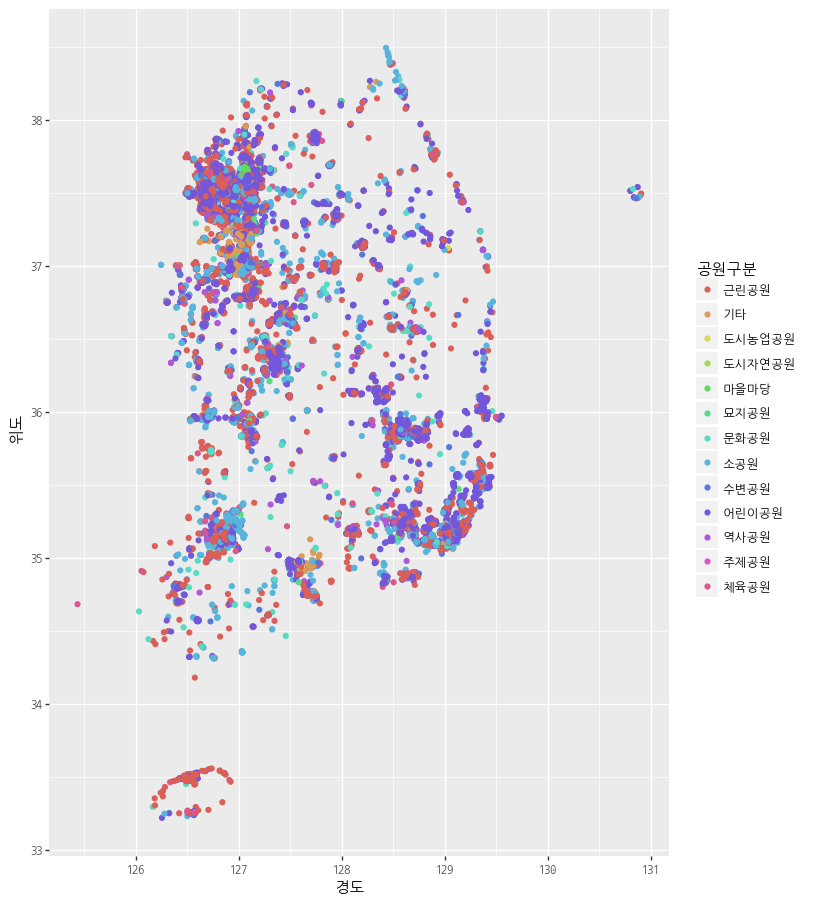

<ggplot: (362004206)>

In [61]:
(
        ggplot(park_202212_ok, aes(x='경도', y='위도', color='공원구분'))
        + geom_point()
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(8, 11))
)

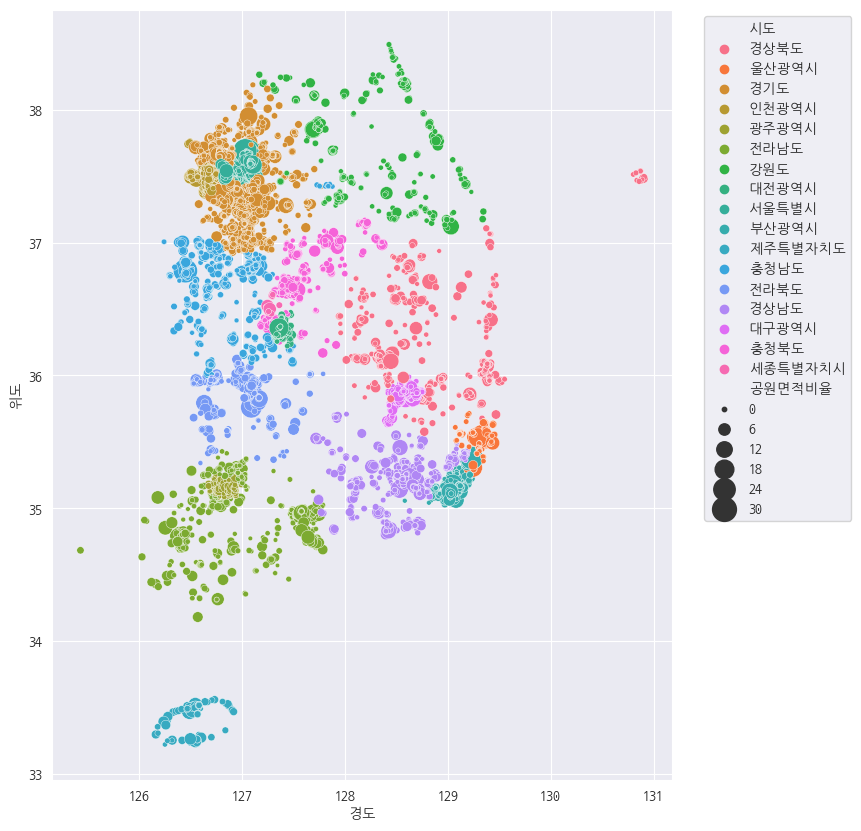

In [62]:
plt.figure(figsize=(8, 10))
sns.scatterplot(data=park_202212_ok, x='경도', y='위도', hue='시도', size='공원면적비율', sizes=(10, 300))
plt.legend(loc=1, bbox_to_anchor=(1.3, 1.0))  # 범례 위치 조정

In [63]:
park_202212_ok.공원구분.value_counts()

어린이공원     9073
근린공원      3917
소공원       2603
기타         577
문화공원       374
수변공원       326
체육공원       250
역사공원       185
마을마당        49
묘지공원        38
도시농업공원       7
도시자연공원       5
주제공원         2
Name: 공원구분, dtype: int64

어린이공원을 제외한 공원 분포

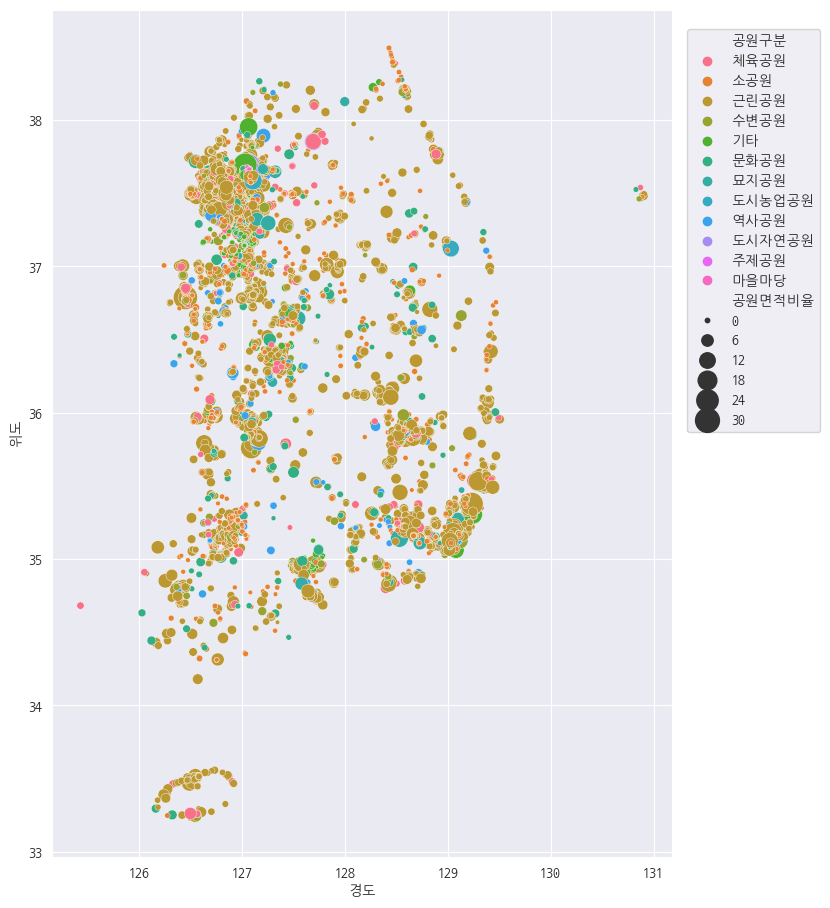

In [64]:
plt.figure(figsize=(8, 11))
sns.scatterplot(data=park_202212_ok[park_202212_ok.공원구분 != '어린이공원'], x='경도', y='위도', hue='공원구분', size='공원면적비율',
                sizes=(10, 300))
plt.legend(loc=5, bbox_to_anchor=(1.25, 0.7389))  # 범례 위치
plt.show()

# 시도별 공원 비율

In [65]:
# value_counts() 메서드로 시도별 합계 데이터를 계산한다.
# value_counts() 메서드의 normalize 속성의 기본값은 False이고 합계를 계산한다.
# value_counts() 메서드의 ascending 속성의 기본값은 False이고 합계를 내림차순으로 계산한다.
# value_counts() 메서드의 dropna 속성의 기본값은 True이고 NaN을 무시하고 계산한다.
park_sido = pd.DataFrame(park_202212_ok['시도'].value_counts(normalize=False, ascending=False, dropna=True))
park_sido

시도
경기도      4426
충청남도     1762
서울특별시    1759
경상남도     1163
전라남도     1038
경상북도     1019
광주광역시     932
충청북도      789
인천광역시     690
부산광역시     674
전라북도      664
강원도       632
대구광역시     631
울산광역시     467
대전광역시     445
제주특별자치도   245
세종특별자치시    70

In [66]:
park_sido_normalize = pd.DataFrame(park_202212_ok['시도'].value_counts(normalize=True, ascending=True, dropna=False))
park_sido_normalize

시도
세종특별자치시 0.004021601746524187
제주특별자치도 0.014075606112834654
대전광역시   0.025565896817189473
울산광역시   0.026829828794668505
대구광역시    0.03625186717223946
강원도     0.036309318625761235
전라북도       0.038147765138458
부산광역시   0.038722279673675745
인천광역시    0.03964150293002413
충청북도    0.045329196828679766
광주광역시   0.053544754682293465
경상북도     0.05854303113868781
전라남도     0.05963460875560152
경상남도     0.06681604044582327
서울특별시    0.10105710674480065
충청남도     0.10122946110536597
경기도      0.25428013328737215

In [67]:
# 시도별 합계 데이터와 비율 데이터를 병합한다.
# 병합하려는 데이터프레임에 병합 기준을 인덱스로 지정하려면 left_index 옵션과 right_index 옵션을 True로 지정한다.
park_sido = park_sido.merge(park_sido_normalize, left_index=True, right_index=True).reset_index()
park_sido.columns = ['시도', '합계', '비율']
# park_sido.sort_values(by=['합계'], ascending=True, inplace=True)
park_sido

시도    합계                   비율
0       경기도  4426  0.25428013328737215
1      충청남도  1762  0.10122946110536597
2     서울특별시  1759  0.10105710674480065
3      경상남도  1163  0.06681604044582327
4      전라남도  1038  0.05963460875560152
5      경상북도  1019  0.05854303113868781
6     광주광역시   932 0.053544754682293465
7      충청북도   789 0.045329196828679766
8     인천광역시   690  0.03964150293002413
9     부산광역시   674 0.038722279673675745
10     전라북도   664    0.038147765138458
11      강원도   632 0.036309318625761235
12    대구광역시   631  0.03625186717223946
13    울산광역시   467 0.026829828794668505
14    대전광역시   445 0.025565896817189473
15  제주특별자치도   245 0.014075606112834654
16  세종특별자치시    70 0.004021601746524187

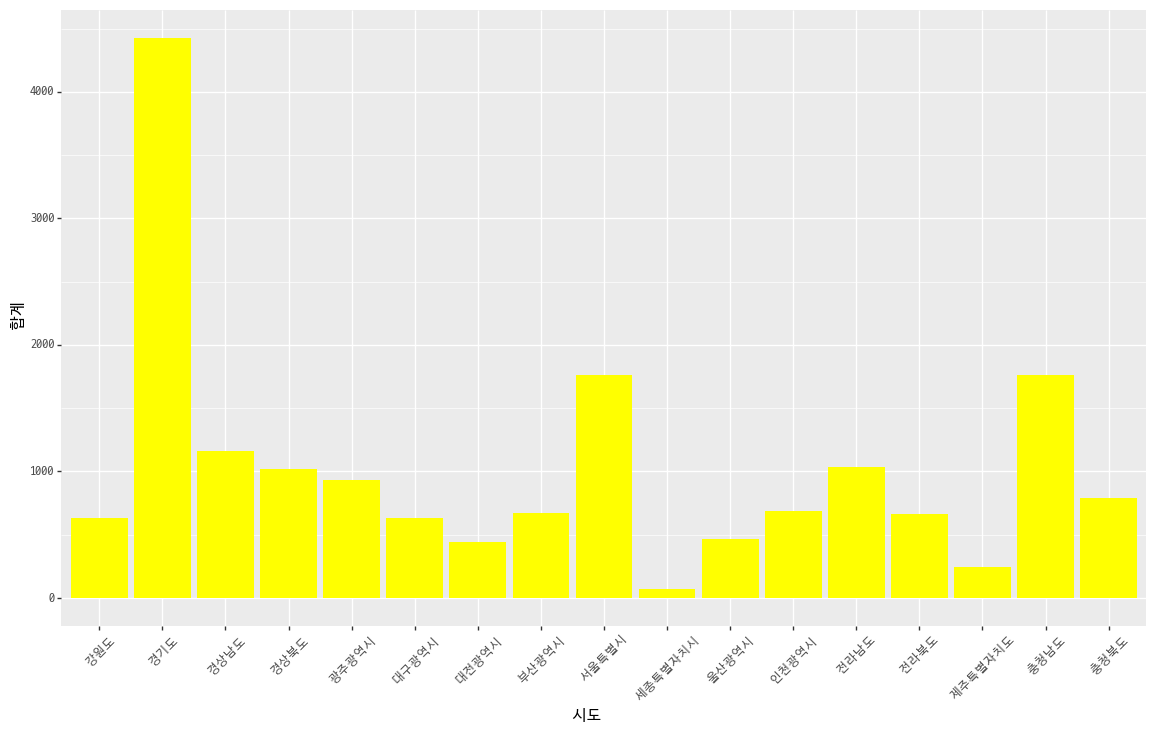

<ggplot: (362070998)>

In [68]:
(ggplot(park_sido, aes(x='시도', y='합계'))
 + geom_bar(stat='identity', position='dodge', fill='yellow')
 + theme(text=element_text(family='D2Coding'), figure_size=(14, 8), axis_text_x=element_text(rotation=45))
 )

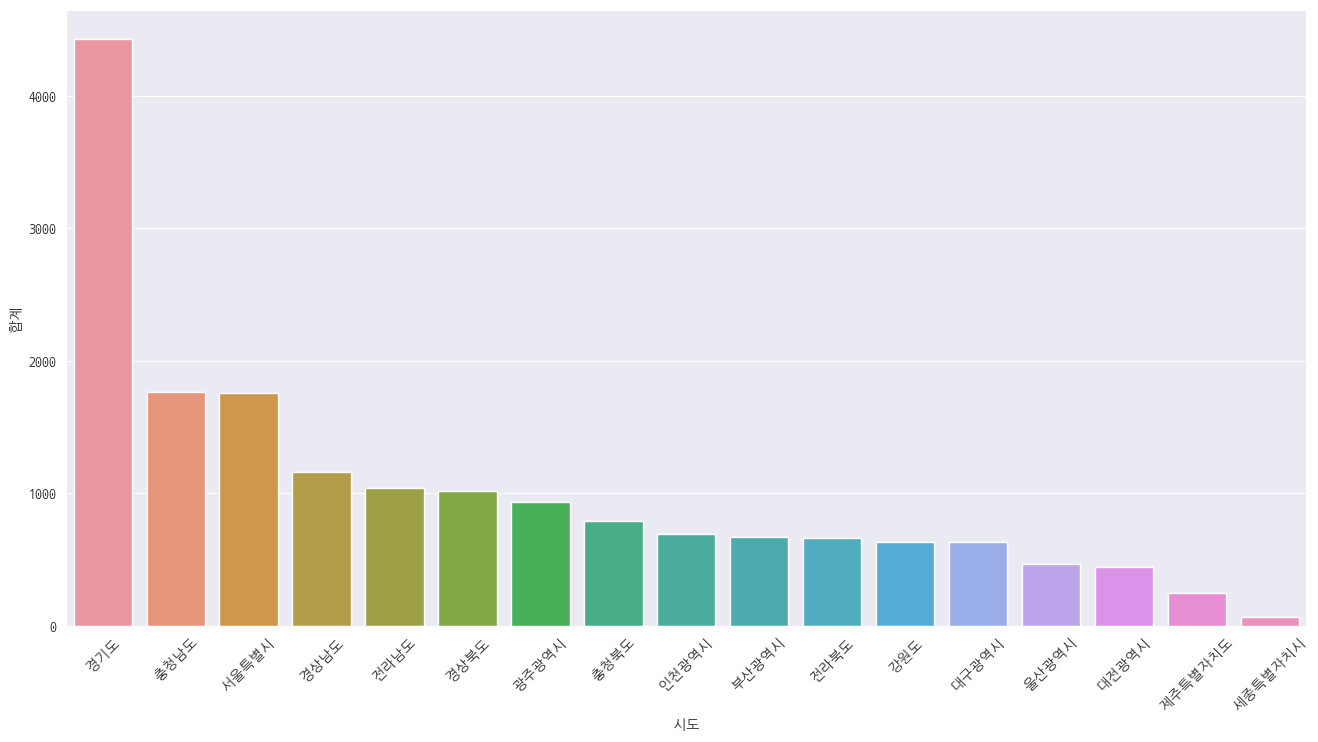

In [69]:
plt.figure(figsize=(16, 8))
sns.barplot(data=park_sido, x='시도', y='합계').set_xticklabels(
    sns.barplot(data=park_sido, x='시도', y='합계').get_xticklabels(), rotation=45)
plt.show()

In [70]:
# import pandas as pd
# import numpy as np
# from plotnine import *

# %matplotlib inline

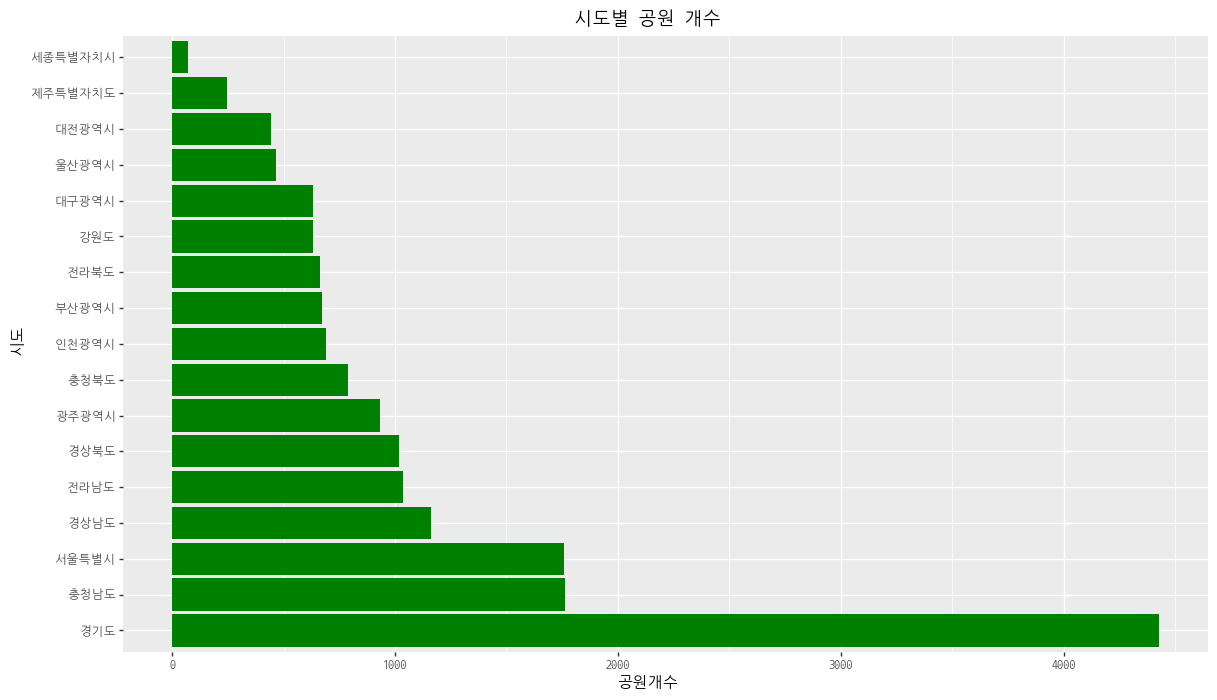

<ggplot: (363630330)>

In [71]:
# Determine order and create a categorical type
# Note that value_counts() is already sorted
park_list = park_202212_ok['시도'].value_counts().index.tolist()
parkList = pd.Categorical(park_202212_ok['시도'], categories=park_list)

# assign to a new column in the DataFrame
park_202212_ok = park_202212_ok.assign(공원목록=parkList)

(ggplot(park_202212_ok)
 + aes(x='공원목록')
 + geom_bar(size=20, fill='green')
 + theme(text=element_text(family='NanumGothicCoding'), figure_size=(14, 8))
 + coord_flip()
 + labs(y='공원개수', x='시도', title='시도별 공원 개수')
 )

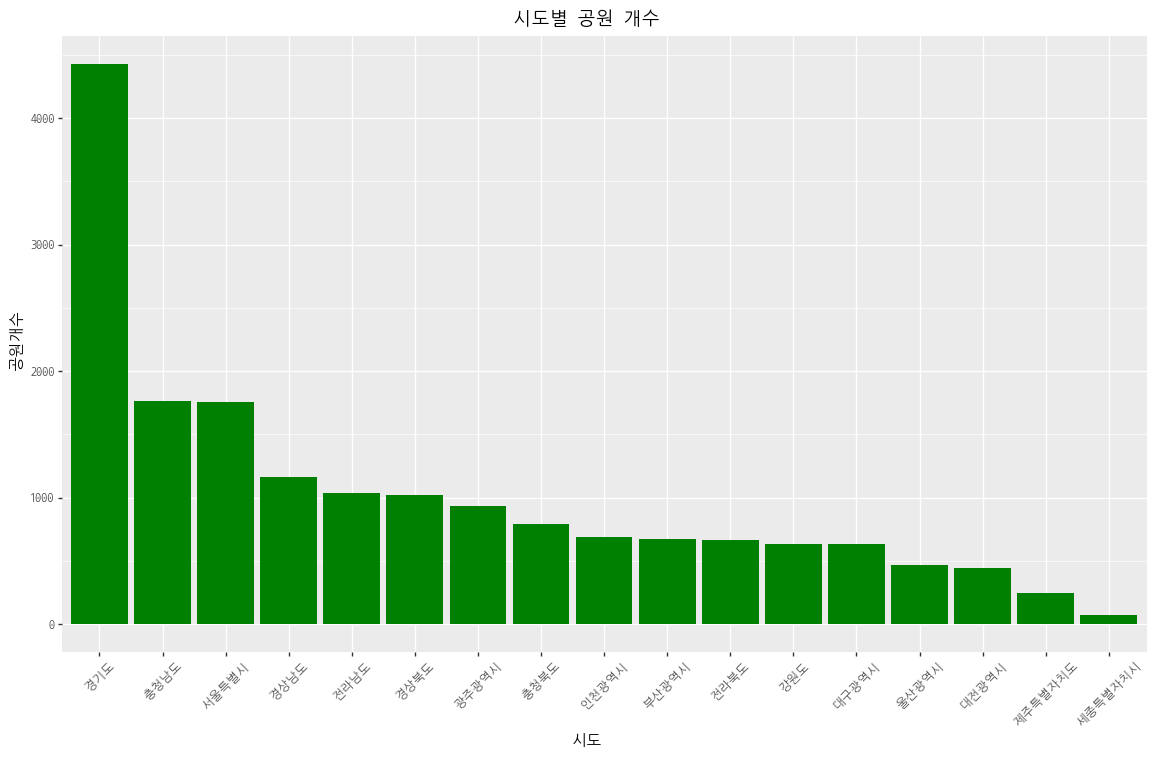

<ggplot: (363661972)>

In [72]:
park_list = park_202212_ok['시도'].value_counts().index.tolist()
parkList = pd.Categorical(park_202212_ok['시도'], categories=park_list)

park_202212_ok = park_202212_ok.assign(공원목록=parkList)

(ggplot(park_202212_ok)
 + aes(x='공원목록')
 + geom_bar(size=20, fill='green')
 + theme(text=element_text(family='NanumGothicCoding'), figure_size=(14, 8), axis_text_x=element_text(rotation=45))
 # + coord_flip()
 + labs(y='공원개수', x='시도', title='시도별 공원 개수')
 )

공원 구분별 합계

In [73]:
park_type = park_202212_ok['공원구분'].value_counts().reset_index()
park_type.columns = ['공원구분', '합계']
park_type

공원구분    합계
0    어린이공원  9073
1     근린공원  3917
2      소공원  2603
3       기타   577
4     문화공원   374
5     수변공원   326
6     체육공원   250
7     역사공원   185
8     마을마당    49
9     묘지공원    38
10  도시농업공원     7
11  도시자연공원     5
12    주제공원     2

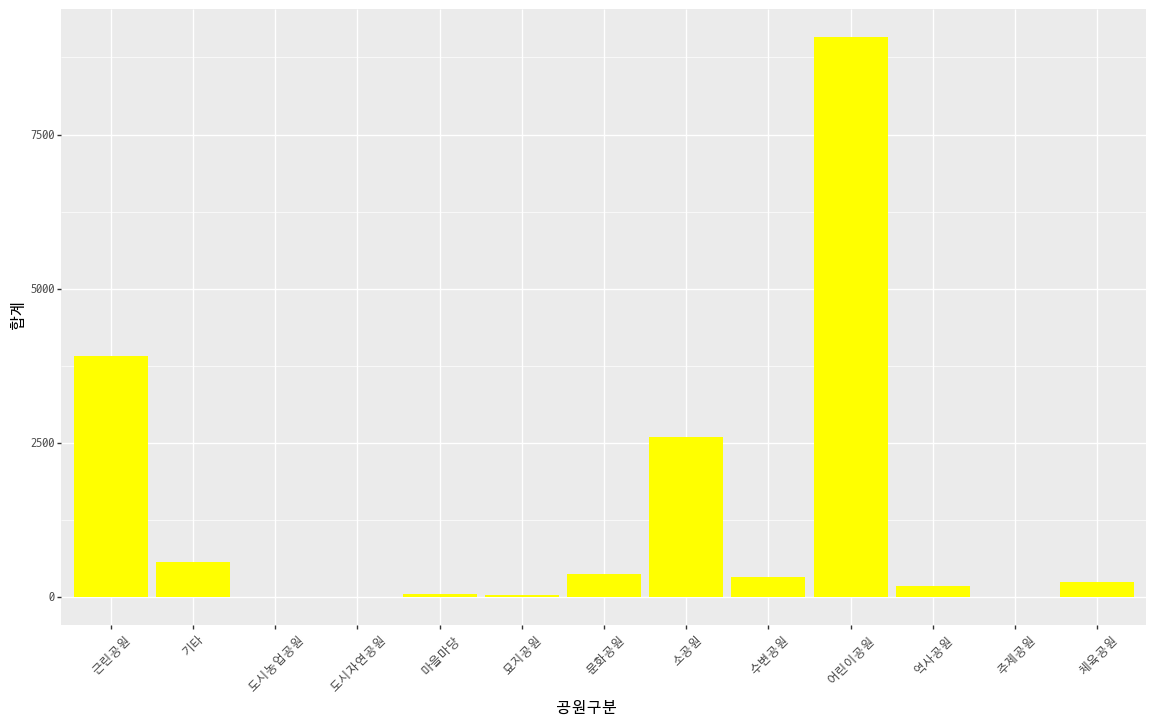

<ggplot: (363727357)>

In [74]:
(ggplot(park_type, aes(x='공원구분', y='합계'))
 + geom_bar(stat='identity', position='dodge', fill='yellow')
 + theme(text=element_text(family='D2Coding'), figure_size=(14, 8), axis_text_x=element_text(rotation=45))
 )

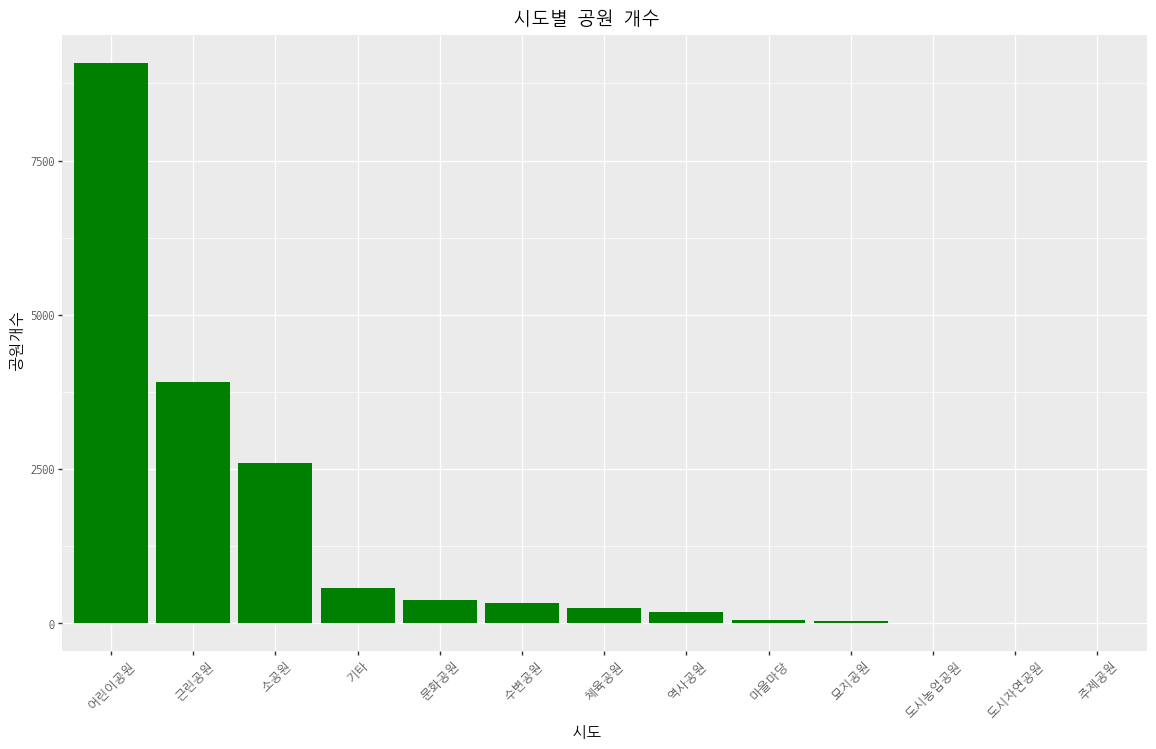

<ggplot: (363676615)>

In [75]:
park_list = park_202212_ok['공원구분'].value_counts().index.tolist()
parkList = pd.Categorical(park_202212_ok['공원구분'], categories=park_list)

park_202212_ok = park_202212_ok.assign(공원목록=parkList)

(ggplot(park_202212_ok)
 + aes(x='공원목록')
 + geom_bar(size=20, fill='green')
 + theme(text=element_text(family='NanumGothicCoding'), figure_size=(14, 8), axis_text_x=element_text(rotation=45))
 # + coord_flip()
 + labs(y='공원개수', x='시도', title='시도별 공원 개수')
 )

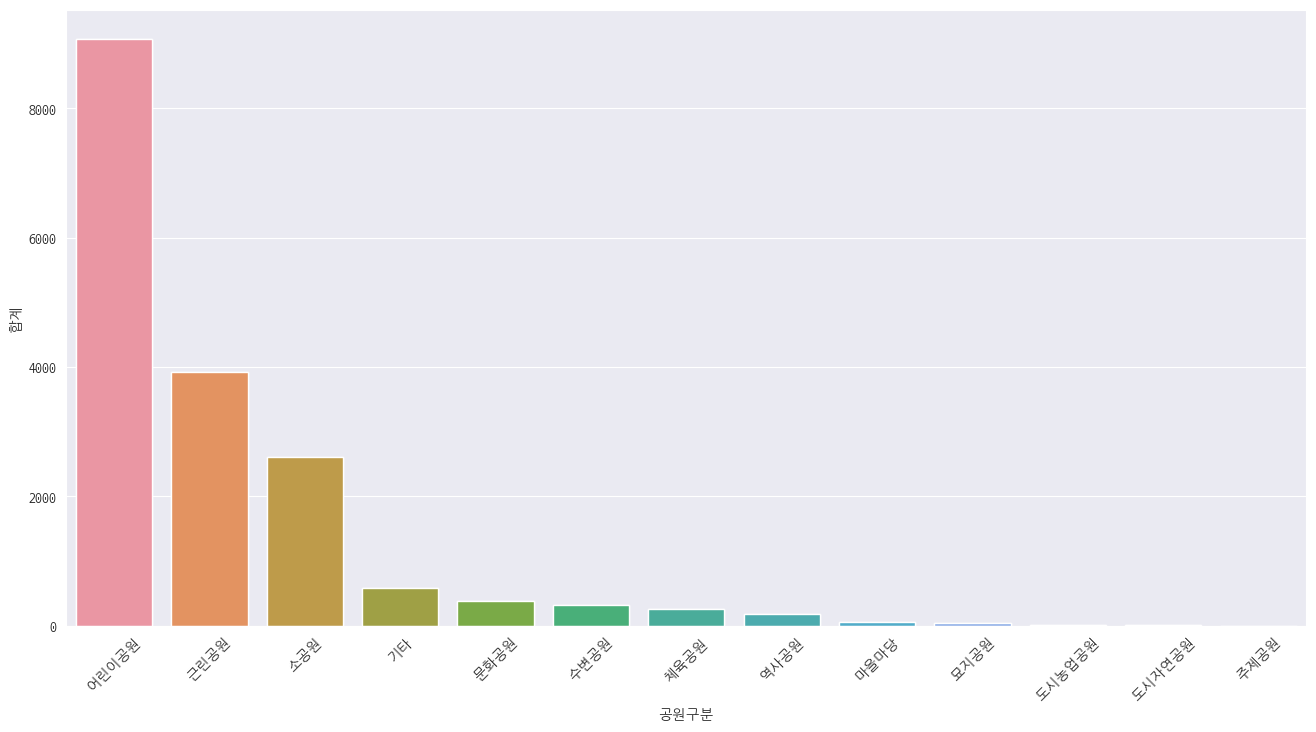

In [76]:
plt.figure(figsize=(16, 8))
sns.barplot(data=park_type, x='공원구분', y='합계').set_xticklabels(
    sns.barplot(data=park_type, x='공원구분', y='합계').get_xticklabels(), rotation=45)
plt.show()

경기도 공원 분포

In [77]:
gyeonggi = park_202212_ok[park_202212_ok['시도'] == '경기도']
gyeonggi

Unnamed: 0         관리번호              공원명   공원구분  \
36             36  41590-00510              71호     기타   
80             80  41370-00108     세교2 제5호 수변공원   수변공원   
81             81  41370-00109           원동수변공원   수변공원   
82             82  41370-00110          가장동체육공원   체육공원   
107           107  41430-00111             근린공원   근린공원   
...           ...          ...              ...    ...   
17460       17460  41461-00025      삼가지구 어린이공원1  어린이공원   
17461       17461  41461-00026       삼가1지구 체육공원   체육공원   
17462       17462  41461-00027      제107호 어린이공원  어린이공원   
17463       17463  41461-00028      제105호 어린이공원  어린이공원   
17464       17464  41465-00016  제15호 근린공원(수지공원)   근린공원   

                      소재지도로명주소                  소재지지번주소          위도  \
36         경기도 화성시 오산동 1030-20      경기도 화성시 오산동 1030-20  37.1857292   
80             경기도 오산시 금암동 198          경기도 오산시 금암동 198  37.1695016   
81          경기도 오산시 부원로87번길 51         경기도 오산시 원동 715-8   37.140907   
82           경기도 오산시 가장산업동로 49        경기도 오산시 가장동 382-4   37.164782   
107           경기도 의왕시 초평동 19-1         경기도 의왕시 초평동 19-1 37.31853826   
...                        ...                      ...         ...   
17460    경기도 용인시 처인구 삼가동 288-1    경기도 용인시 처인구 삼가동 288-1   37.238001   
17461   경기도 용인시 처인구 삼가동 268-26   경기도 용인시 처인구 삼가동 268-26 37.23823531   
17462  경기도 용인시 처인구 모현읍 왕산리 949  경기도 용인시 처인구 모현읍 왕산리 949 37.33393818   
17463   경기도 용인시 처인구 포곡읍 둔전리450   경기도 용인시 처인구 포곡읍 둔전리450 37.27292155   
17464     경기도 용인시 수지구 풍덕천동 696     경기도 용인시 수지구 풍덕천동 696 37.32397857   

               경도     공원면적           전화번호     데이터기준일자   제공기관코드    제공기관명  \
36    127.1026187  6,934.0  031-5189-6961  2022-11-01  5530000  경기도 화성시   
80     127.049281  1,258.0  031-8036-6473  2022-04-30  4000000  경기도 오산시   
81     127.091507 17,788.0  031-8036-6473  2022-04-30  4000000  경기도 오산시   
82     127.041189 11,856.0  031-8036-6473  2022-04-30  4000000  경기도 오산시   
107   126.9444774 14,234.0   031-345-3083  2022-06-13  4030000  경기도 의왕시   
...           ...      ...            ...         ...      ...      ...   
17460 127.1642486  4,878.0            NaN  2022-11-23  4050000  경기도 용인시   
17461 127.1693019 17,748.0            NaN  2022-11-23  4050000  경기도 용인시   
17462 127.2538619  5,817.0            NaN  2022-11-23  4050000  경기도 용인시   
17463 127.2217992  2,558.0            NaN  2022-11-23  4050000  경기도 용인시   
17464 127.0910048 15,741.0            NaN  2022-11-23  4050000  경기도 용인시   

                  공원면적비율   시도  시군구       주소     기타주소   공원목록  
36    0.8327064308626421  경기도  화성시      오산동  1030-20     기타  
80     0.354682957019364  경기도  오산시      금암동      198   수변공원  
81    1.3337166115783368  경기도  오산시  부원로87번길       51   수변공원  
82     1.088852607105296  경기도  오산시   가장산업동로       49   체육공원  
107   1.1930632841555389  경기도  의왕시      초평동     19-1   근린공원  
...                  ...  ...  ...      ...      ...    ...  
17460 0.6984268036093689  경기도  용인시      처인구      삼가동  어린이공원  
17461  1.332216198670471  경기도  용인시      처인구      삼가동   체육공원  
17462 0.7626925986267338  경기도  용인시      처인구      모현읍  어린이공원  
17463 0.5057667446560717  경기도  용인시      처인구      포곡읍  어린이공원  
17464  1.254631419979589  경기도  용인시      수지구     풍덕천동   근린공원  

[4426 rows x 19 columns]

In [78]:
gyeonggi_type = pd.DataFrame(gyeonggi['공원구분'].value_counts()).reset_index()
gyeonggi_type.columns = ['공원구분', '합계']
gyeonggi_type

공원구분    합계
0   어린이공원  2126
1    근린공원  1008
2     소공원   512
3      기타   391
4    문화공원   123
5    수변공원   110
6    체육공원   104
7    역사공원    38
8    묘지공원    12
9  도시농업공원     2

In [79]:
gyeonggi_map = folium.Map(location=[gyeonggi['위도'].mean(), gyeonggi['경도'].mean()], zoom_start=9)
for i in gyeonggi.index:
    parkName = folium.Popup('{} - {}'.format(gyeonggi.loc[i, '공원명'], gyeonggi.loc[i, '소재지도로명주소']), max_width=300)
    # print(parkName)
    folium.Marker(location=[gyeonggi.loc[i, '위도'], gyeonggi.loc[i, '경도']], popup=parkName).add_to(gyeonggi_map)
gyeonggi_map

수원시 공원 분포

In [80]:
suwon = park_202212_ok[park_202212_ok['시군구'] == '수원시']
suwon

Unnamed: 0         관리번호     공원명  공원구분                   소재지도로명주소  \
529           529  41113-00121  12호소공원   소공원      경기도 수원시 권선구 평동 13-236   
1061         1061  41111-00059  61호소공원   소공원  경기도 수원시 장안구 정조로 1053번길 36   
1086         1086  41111-00058  60호소공원   소공원      경기도 수원시 장안구 정자동 836-5   
1137         1137  41111-00057  40호소공원   소공원     경기도 수원시 장안구 정자동 569-11   
4668         4668  41111-00055    송원공원   소공원      경기도 수원시 장안구 조원동 912-2   
...           ...          ...     ...   ...                        ...   
6667         6667  41113-00010      솔대  근린공원        경기도 수원시 권선구 고색동 992   
6668         6668  41113-00011   고색중보들  근린공원       경기도 수원시 권선구 고색동 1129   
6669         6669  41113-00012     들바람  근린공원        경기도 수원시 권선구 고색동 931   
6670         6670  41113-00013      고렴  근린공원       경기도 수원시 권선구 곡반정동 546   
15635       15635  41111-00056  39호소공원   소공원        경기도 수원시 장안구 이목동 850   

                      소재지지번주소          위도          경도      공원면적          전화번호  \
529     경기도 수원시 권선구 평동 13-236 37.23979543 127.0552753   1,315.3  031-228-6195   
1061    경기도 수원시 장안구 송죽동 346-6   37.299249 127.0034947     971.3  031-228-5995   
1086    경기도 수원시 장안구 정자동 836-5 37.29744098 126.9981817   3,482.0  031-228-5995   
1137   경기도 수원시 장안구 정자동 569-11 37.31075034 126.9869221   2,531.0  031-228-5995   
4668    경기도 수원시 장안구 조원동 912-2 37.30768169 127.0113154   3,071.0  031-228-5995   
...                       ...         ...         ...       ...           ...   
6667      경기도 수원시 권선구 고색동 992 37.23618536 126.9817029  10,354.0  031-228-6195   
6668     경기도 수원시 권선구 고색동 1129 37.24822973 126.9900297 138,326.5  031-228-6195   
6669      경기도 수원시 권선구 고색동 931 37.24072849 126.9787184   5,186.7  031-228-6195   
6670     경기도 수원시 권선구 곡반정동 546 37.24063001 127.0292104  10,571.0  031-228-6195   
15635     경기도 수원시 장안구 이목동 850  37.3142763 126.9862086   2,817.0  031-228-5995   

          데이터기준일자   제공기관코드    제공기관명             공원면적비율   시도  시군구   주소  기타주소  \
529    2022-06-20  3740000  경기도 수원시 0.3626706494879342  경기도  수원시  권선구    평동   
1061   2022-06-20  3740000  경기도 수원시  0.311656862590895  경기도  수원시  장안구   정조로   
1086   2022-06-20  3740000  경기도 수원시 0.5900847396772771  경기도  수원시  장안구   정자동   
1137   2022-06-20  3740000  경기도 수원시 0.5030904491242106  경기도  수원시  장안구   정자동   
4668   2022-06-20  3740000  경기도 수원시 0.5541660400998965  경기도  수원시  장안구   조원동   
...           ...      ...      ...                ...  ...  ...  ...   ...   
6667   2022-06-20  3740000  경기도 수원시    1.0175460677532  경기도  수원시  권선구   고색동   
6668   2022-06-20  3740000  경기도 수원시 3.7192270702391914  경기도  수원시  권선구   고색동   
6669   2022-06-20  3740000  경기도 수원시 0.7201874755922932  경기도  수원시  권선구   고색동   
6670   2022-06-20  3740000  경기도 수원시  1.028153685010174  경기도  수원시  권선구  곡반정동   
15635  2022-06-20  3740000  경기도 수원시  0.530754180388624  경기도  수원시  장안구   이목동   

       공원목록  
529     소공원  
1061    소공원  
1086    소공원  
1137    소공원  
4668    소공원  
...     ...  
6667   근린공원  
6668   근린공원  
6669   근린공원  
6670   근린공원  
15635   소공원  

[335 rows x 19 columns]

In [81]:
suwon_type = pd.DataFrame(suwon['공원구분'].value_counts()).reset_index()
suwon_type.columns = ['공원구분', '합계']
suwon_type

공원구분   합계
0  어린이공원  202
1   근린공원   61
2    소공원   40
3   수변공원   14
4   문화공원   11
5   체육공원    4
6   역사공원    3

In [82]:
suwon_map = folium.Map(location=[suwon['위도'].mean(), suwon['경도'].mean()], zoom_start=13)
for i in suwon.index:
    parkName = folium.Popup('{} - {}'.format(suwon.loc[i, '공원명'], suwon.loc[i, '소재지도로명주소']), max_width=300)
    # print(parkName)
    folium.Marker(location=[suwon.loc[i, '위도'], suwon.loc[i, '경도']], popup=parkName).add_to(suwon_map)
suwon_map

In [83]:
suwon_map = folium.Map(location=[suwon['위도'].mean(), suwon['경도'].mean()], zoom_start=13)
for i in suwon.index:
    parkName = folium.Popup('{} - {}'.format(suwon.loc[i, '공원명'], suwon.loc[i, '소재지도로명주소']), max_width=300)
    # print(parkName)
    folium.CircleMarker(location=[suwon.loc[i, '위도'], suwon.loc[i, '경도']], popup=parkName,
                        radius=suwon.loc[i, '공원면적비율'] * 5, color='green', fill_color='green').add_to(suwon_map)
suwon_map

경기도 일부 공원만 보기

In [84]:
park_type = r'.*([역사|체육|수변|문화|묘지]공원).*'
gyeonggi_sample = gyeonggi[gyeonggi['공원구분'].str.match(park_type)]
gyeonggi_sample

Unnamed: 0         관리번호           공원명  공원구분  \
80             80  41370-00108  세교2 제5호 수변공원  수변공원   
81             81  41370-00109        원동수변공원  수변공원   
82             82  41370-00110       가장동체육공원  체육공원   
108           108  41430-00114        갈미한글공원  문화공원   
109           109  41430-00115         문화공원3  문화공원   
...           ...          ...           ...   ...   
17233       17233  41610-00004        중대물빛공원  수변공원   
17448       17448  41461-00013       천주교묘지공원  묘지공원   
17450       17450  41461-00015        용인묘지공원  묘지공원   
17451       17451  41461-00016        서울묘지공원  묘지공원   
17461       17461  41461-00026    삼가1지구 체육공원  체육공원   

                         소재지도로명주소                    소재지지번주소          위도  \
80                경기도 오산시 금암동 198            경기도 오산시 금암동 198  37.1695016   
81             경기도 오산시 부원로87번길 51           경기도 오산시 원동 715-8   37.140907   
82              경기도 오산시 가장산업동로 49          경기도 오산시 가장동 382-4   37.164782   
108             경기도 의왕시 내손동 228-1          경기도 의왕시 내손동 228-1 37.37796498   
109             경기도 의왕시 고천동 100-2          경기도 의왕시 고천동 100-2 37.34045017   
...                           ...                        ...         ...   
17233           경기도 광주시 중대동 246-2          경기도 광주시 중대동 246-2 37.40037427   
17448  경기도 용인시 처인구 모현읍 오산로 154-62  경기도 용인시 처인구 모현읍 오산리 325-4  37.3211043   
17450   경기도 용인시 처인구 모현읍 초부리 산67-6  경기도 용인시 처인구 모현읍 초부리 산67-6 37.29542684   
17451     경기도 용인시 처인구 이동읍 서리 산4-8    경기도 용인시 처인구 이동읍 서리 산4-8  37.2201686   
17461      경기도 용인시 처인구 삼가동 268-26     경기도 용인시 처인구 삼가동 268-26 37.23823531   

               경도        공원면적           전화번호     데이터기준일자   제공기관코드    제공기관명  \
80     127.049281     1,258.0  031-8036-6473  2022-04-30  4000000  경기도 오산시   
81     127.091507    17,788.0  031-8036-6473  2022-04-30  4000000  경기도 오산시   
82     127.041189    11,856.0  031-8036-6473  2022-04-30  4000000  경기도 오산시   
108   126.9849552    12,537.0   031-345-3534  2022-06-13  4030000  경기도 의왕시   
109   126.9724043    15,982.0   031-345-3083  2022-06-13  4030000  경기도 의왕시   
...           ...         ...            ...         ...      ...      ...   
17233 127.2189004   230,932.0   031-762-1039  2022-10-05  5540000  경기도 광주시   
17448 127.1465269   847,474.0            NaN  2022-11-23  4050000  경기도 용인시   
17450 127.2560058 1,307,080.0            NaN  2022-11-23  4050000  경기도 용인시   
17451 127.1743465   202,150.0            NaN  2022-11-23  4050000  경기도 용인시   
17461 127.1693019    17,748.0            NaN  2022-11-23  4050000  경기도 용인시   

                  공원면적비율   시도  시군구       주소   기타주소  공원목록  
80     0.354682957019364  경기도  오산시      금암동    198  수변공원  
81    1.3337166115783368  경기도  오산시  부원로87번길     51  수변공원  
82     1.088852607105296  경기도  오산시   가장산업동로     49  체육공원  
108   1.1196874563912915  경기도  의왕시      내손동  228-1  문화공원  
109    1.264199351368288  경기도  의왕시      고천동  100-2  문화공원  
...                  ...  ...  ...      ...    ...   ...  
17233  4.805538471389029  경기도  광주시      중대동  246-2  수변공원  
17448  9.205835106061807  경기도  용인시      처인구    모현읍  묘지공원  
17450 11.432759946749515  경기도  용인시      처인구    모현읍  묘지공원  
17451  4.496109429273269  경기도  용인시      처인구    이동읍  묘지공원  
17461  1.332216198670471  경기도  용인시      처인구    삼가동  체육공원  

[387 rows x 19 columns]

In [85]:
gyeonggi_sample.value_counts('공원구분')

공원구분
문화공원    123
수변공원    110
체육공원    104
역사공원     38
묘지공원     12
dtype: int64

In [86]:
gyeonggi_sample_map = folium.Map(location=[gyeonggi_sample['위도'].mean(), gyeonggi_sample['경도'].mean()], zoom_start=13)
for i in gyeonggi_sample.index:
    parkName = folium.Popup('{} - {}'.format(gyeonggi_sample.loc[i, '공원명'], gyeonggi_sample.loc[i, '소재지도로명주소']),
                            max_width=300)
    # print(parkName)
    folium.CircleMarker(location=[gyeonggi_sample.loc[i, '위도'], gyeonggi_sample.loc[i, '경도']], popup=parkName,
                        radius=gyeonggi_sample.loc[i, '공원면적비율'] * 5, color='green', fill_color='green').add_to(
        gyeonggi_sample_map)
gyeonggi_sample_map